<a href="https://colab.research.google.com/github/MattWestCode/Matt_psu_quants_fork/blob/investing/SMA%20Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import random
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


[*********************100%%**********************]  1 of 1 completed
[291.1199951171875, 282.7300109863281, 271.1600036621094, 273.7200012207031, 268.0899963378906, 266.6099853515625, 266.1499938964844, 272.4200134277344, 263.5199890136719, 254.82000732421875, 252.52999877929688, 248.14999389648438, 254.75, 249.02000427246094, 249.52999877929688, 254.82000732421875, 256.82000732421875, 261.7900085449219, 261.8999938964844, 266.6300048828125, 259.94000244140625, 264.6499938964844, 258.6600036621094, 258.1199951171875, 263.760009765625, 264.45001220703125, 275.75, 276.1400146484375, 271.82000732421875, 266.7200012207031, 265.92999267578125, 261.3999938964844, 267.55999755859375, 278.7300109863281, 278.1199951171875, 284.7900085449219, 277.1099853515625, 283.2900085449219, 267.6700134277344, 280.8299865722656, 263.1099853515625, 261.3599853515625, 265.29998779296875, 287.3800048828125, 294.67999267578125, 293.4100036621094, 278.7699890136719, 272.42999267578125, 276.4800109863281, 275.079

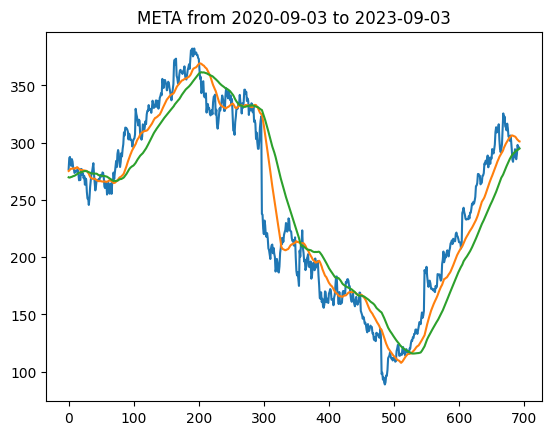

In [61]:

cash = 1000



# Data Variables
start_date = "2020-09-03"
end_date = "2023-09-03"
interval_time = "1d"
ticker = "META"
is_holding = False
current_holding_price = 0
consolidation_indicator = 0
consolidation_times = 3
sma_short_index = []
sma_long_index = []

# Strategy Variables
sma_short_length = 30
sma_long_length = 60


# Downloading backtest data
stock_data = yf.download(ticker,start=start_date, end=end_date, interval=interval_time)
stock_data = [float(i) for i in stock_data['Close']]
print(stock_data)
'''
# Generates Random Stock Movements
start_num = 250
range_num = 5
for i in range(0, 200):
  n = random.randint(start_num - range_num, start_num + range_num)
  data.append(n)
  start_num = n
print(data)
'''


#Main
for i in range(0, len(stock_data)-sma_long_length):
  sma_short = sum(stock_data[sma_long_length-sma_short_length+i:i+sma_long_length])/sma_short_length
  sma_long = sum(stock_data[i:i+sma_long_length])/sma_long_length

  sma_short_index.append(sma_short)
  sma_long_index.append(sma_long)



  #print (stock_data[i+sma_long_length], sma_short, sma_long, i, consolidation_indicator)

 # Consolidation Signals




 # Buy / Sell Signals
  if (sma_short > sma_long) and is_holding == False:
    is_holding = True
    current_holding_price = stock_data[i+sma_long_length]
    cash = cash - current_holding_price
    print("BUY, CURRENT PRICE:" + str(current_holding_price), cash, "---------------")

  if (sma_short < sma_long) and is_holding == True:
    is_holding = False
    current_holding_price = stock_data[i+sma_long_length]
    cash = cash + current_holding_price
    print("SELL, CURRENT PRICE:" + str(current_holding_price), cash, "---------------")

  pass

if is_holding == True:
  cash = cash + stock_data[-1]
port_return = str(((cash-1000)/1000)*100)+"%"
print(cash, port_return)
print(str(((stock_data[-1]-stock_data[sma_long_length])/stock_data[sma_long_length])*100)+"%")

plt.plot(stock_data[sma_long_length:-1], label = ticker)
plt.plot(sma_short_index, label = str(sma_short_length) + 'MA')
plt.plot(sma_long_index, label = str(sma_long_length) + 'MA')
plt.title(ticker + " from " + start_date + " to " + end_date)
plt.show()